# Diabetes Prediction Project

This project uses a public diabetes dataset to predict whether a patient is likely to have diabetes based on medical attributes. The goal is to build a machine learning model to assist in early diagnosis and decision-making.


# **Import** **Libraries**

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

plt.style.use('fivethirtyeight')

from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')



# **Load the Dataset**

In [112]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.xlsx to diabetes (1).xlsx


In [113]:
path = 'diabetes.xlsx'
df = pd.read_excel(path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Data Cleaning and Preprocessing**

In [114]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols:
    if col not in df.columns:
        continue
    if (df[col] == 0).any():
        mean_value = df.loc[df[col] != 0, col].mean()
        original_dtype = df[col].dtype
        if original_dtype == 'int64':
            mean_value = int(round(mean_value))
            df[col] = df[col].replace(0, mean_value).astype('int64')
        else:
            df[col] = df[col].replace(0, mean_value)



In [115]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,156,33.6,0.627,50,1
1,1,85,66,29,156,26.6,0.351,31,0
2,8,183,64,29,156,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [116]:
print("\n--- Dataset Information ---")
df.info()


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [117]:
print("\n--- Missing Values Check ---")
print(df.isnull().sum())


--- Missing Values Check ---
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# **Model Building and Evaluation**


In [118]:
featuers = df.drop('Outcome', axis = 1)
target = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(featuers, target, test_size=.2, random_state= 42, shuffle= True)

In [119]:
results = []

def train_and_evaluate(model, name):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })
    print(f" {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("="*60)


In [120]:
train_and_evaluate(LogisticRegression(), 'Logistic Regression')
train_and_evaluate(KNeighborsClassifier(), 'KNN')
train_and_evaluate(SVC(), 'SVM')
train_and_evaluate(GradientBoostingClassifier(), 'GB')
train_and_evaluate(RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 500), 'Random Forest')

 Logistic Regression
[[82 17]
 [19 36]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154

 KNN
[[66 33]
 [20 35]]
              precision    recall  f1-score   support

           0       0.77      0.67      0.71        99
           1       0.51      0.64      0.57        55

    accuracy                           0.66       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.68      0.66      0.66       154

 SVM
[[87 12]
 [25 30]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        99
           1       0.71      0.55      0.62        55

    accuracy                           0.76       154
   macro avg       0.75      0.71      0

In [121]:
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending= False).reset_index(drop=True)
results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.766234,0.679245,0.654545,0.666667
1,SVM,0.759740,0.714286,0.545455,0.618557
2,Random Forest,0.753247,0.644068,0.690909,0.666667
3,GB,0.733766,0.612903,0.690909,0.649573
4,KNN,0.655844,0.514706,0.636364,0.569106


# Resampling

In [122]:
rm=RandomOverSampler(random_state=41)
x_res,y_res=rm.fit_resample(featuers,target)

x_train_rm, x_test_rm, y_train_rm, y_test_rm = train_test_split(x_res, y_res, test_size=0.2, random_state=41)

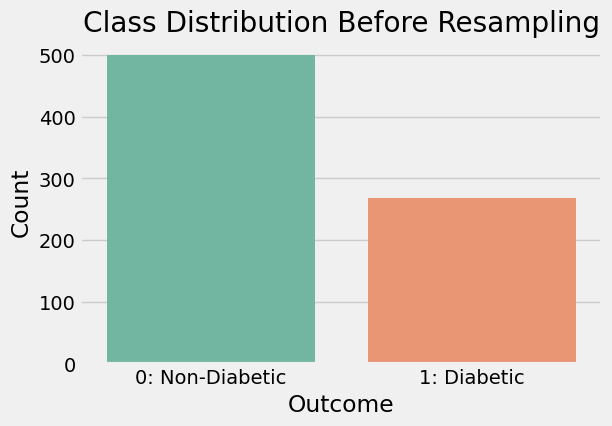

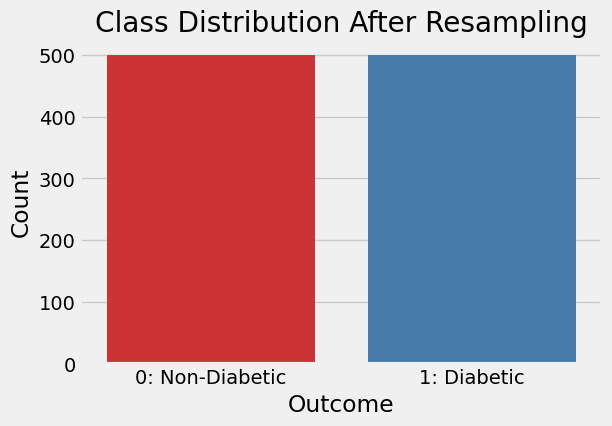

In [123]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=target, palette='Set2')
plt.title('Class Distribution Before Resampling')
plt.xlabel('Outcome')
plt.ylabel('Count')
ax.set_xticklabels(['0: Non-Diabetic', '1: Diabetic'])
plt.show()


plt.figure(figsize=(6, 4))
ax = sns.countplot(x=y_res, palette='Set1')
plt.title('Class Distribution After Resampling')
plt.xlabel('Outcome')
plt.ylabel('Count')
ax.set_xticklabels(['0: Non-Diabetic', '1: Diabetic'])
plt.show()

# **Model Building and Evaluation**

In [124]:
results = []
confusion_data = []


color_maps = {
    'Logistic Regression': 'Greens',
    'Support Vector Machine': 'Oranges',
    'Random Forest': 'Blues',
    'K-Nearest Neighbors': 'Purples'
}

def train_and_evaluate(model, name):
    model.fit(x_train_rm, y_train_rm)
    y_pred = model.predict(x_test_rm)


    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test_rm, y_pred),
        'Precision': precision_score(y_test_rm, y_pred),
        'Recall': recall_score(y_test_rm, y_pred),
        'F1 Score': f1_score(y_test_rm, y_pred)
    })


    print(f"\n{name}")
    print(confusion_matrix(y_test_rm, y_pred))
    print(classification_report(y_test_rm, y_pred))
    print("=" * 60)


    cm = confusion_matrix(y_test_rm, y_pred)
    confusion_data.append((name, cm))


In [125]:
train_and_evaluate(LogisticRegression(random_state=41), 'Logistic Regression')
train_and_evaluate(KNeighborsClassifier(), 'KNN')
train_and_evaluate(SVC(random_state=41, probability=True), 'SVM')
train_and_evaluate(GradientBoostingClassifier(), 'GB')
train_and_evaluate(RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 500), 'Random Forest')


Logistic Regression
[[74 20]
 [34 72]]
              precision    recall  f1-score   support

           0       0.69      0.79      0.73        94
           1       0.78      0.68      0.73       106

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200


KNN
[[64 30]
 [25 81]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70        94
           1       0.73      0.76      0.75       106

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200


SVM
[[69 25]
 [35 71]]
              precision    recall  f1-score   support

           0       0.66      0.73      0.70        94
           1       0.74      0.67      0.70       106

    accuracy                           0.70       200
   macro avg       0.70      0.70      0

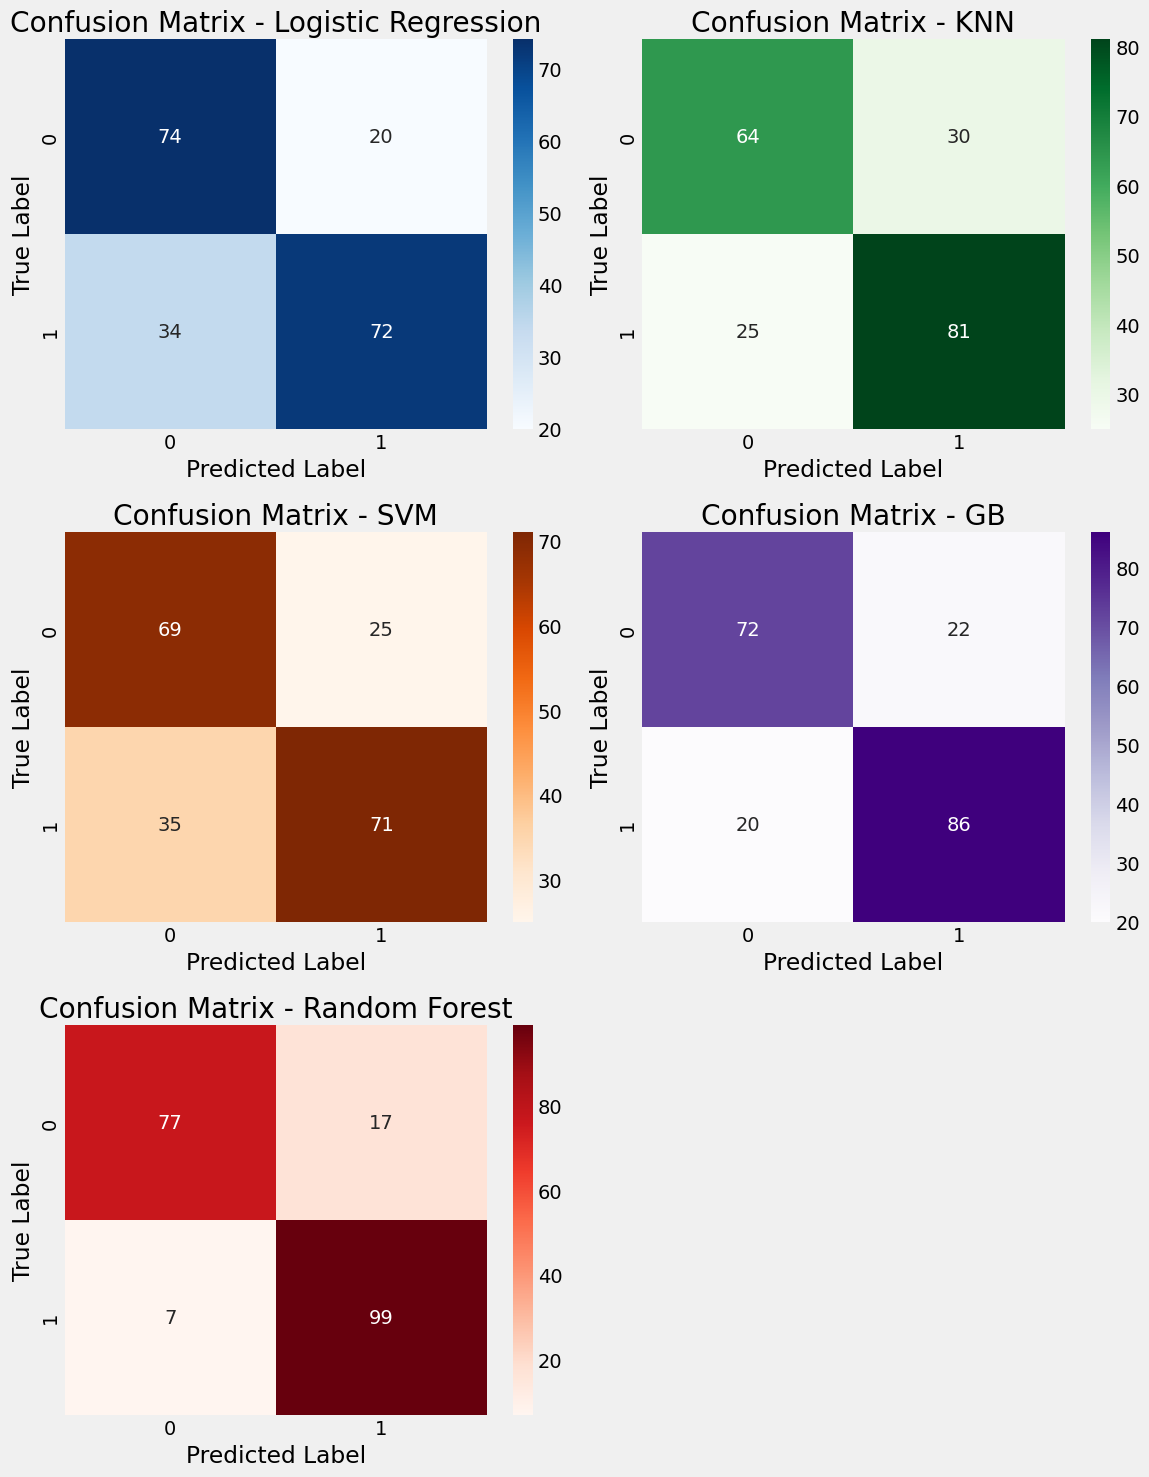

In [126]:

available_cmaps = ['Blues', 'Greens', 'Oranges', 'Purples', 'Reds', 'YlGnBu']


n_models = len(confusion_data)

cols = 2
rows = math.ceil(n_models / cols)


fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5))
axes = axes.flatten()

for i, (name, cm) in enumerate(confusion_data):
    cmap = available_cmaps[i % len(available_cmaps)]
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {name}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [127]:
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending= False).reset_index(drop=True)
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.880,0.853448,0.933962,0.891892
1,GB,0.790,0.796296,0.811321,0.803738
2,Logistic Regression,0.730,0.782609,0.679245,0.727273
3,KNN,0.725,0.729730,0.764151,0.746544
4,SVM,0.700,0.739583,0.669811,0.702970


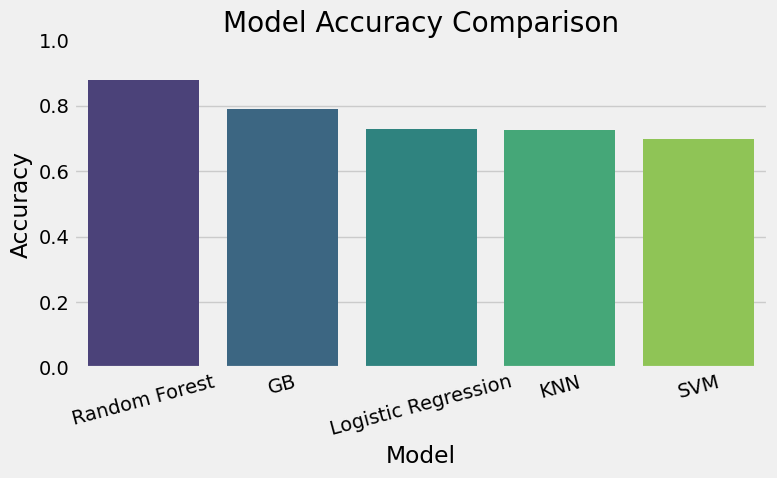

In [128]:
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=results_df_sorted, x='Model', y='Accuracy', palette='viridis')

plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1.0)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


 Conclusion

The best-performing model was the Random Forest Classifier with an accuracy of 88% This model shows strong potential in supporting medical professionals with diabetes diagnosis.


# **Generate Predictions**

In [129]:
rf_model = RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 500)
rf_model.fit(x_train_rm, y_train_rm)


def get_user_input():
    print("\n" + "="*40)
    print("Diabetes Risk Assessment Tool")
    print("="*40)
    print("Please enter the following health metrics:\n")

    features = [
        ("Number of pregnancies", 0, 20),
        ("Glucose level (mg/dL)", 0, 300),
        ("Blood pressure (mmHg)", 0, 200),
        ("Skin thickness (mm)", 0, 100),
        ("Insulin level (μU/mL)", 0, 300),
        ("BMI (kg/m²)", 10, 200),
        ("Diabetes pedigree function", 0.0, 2.0),
        ("Age (years)", 10, 100)
    ]

    user_data = []
    for feature, min_val, max_val in features:
        while True:
            try:
                value = float(input(f"{feature} ({min_val}-{max_val}): "))
                if min_val <= value <= max_val:
                    user_data.append(value)
                    break
                else:
                    print(f"Please enter a value between {min_val} and {max_val}")
            except ValueError:
                print("Please enter a valid number")

    return np.array([user_data])

def predict_diabetes_risk():
    while True:
        user_data = get_user_input()
        prediction = rf_model.predict(user_data)

        result = "Non Diabetic" if prediction[0] == 1 else "Diabetic"
        confidence = np.max(rf_model.predict_proba(user_data)) * 100

        print("\n" + "="*40)
        print("Prediction Result:")
        print(f"Risk Level: {result}")
        print(f"Confidence: {confidence:.1f}%")
        print("="*40)

        another = input("\nWould you like to check another person? (yes/no): ").lower()
        if another != 'yes':
            print("\nThank you for using the Diabetes Risk Assessment Tool!")
            break

predict_diabetes_risk()


Diabetes Risk Assessment Tool
Please enter the following health metrics:

Number of pregnancies (0-20): 3
Glucose level (mg/dL) (0-300): 120
Blood pressure (mmHg) (0-200): 120
Skin thickness (mm) (0-100): 30
Insulin level (μU/mL) (0-300): 120
BMI (kg/m²) (10-200): 90
Diabetes pedigree function (0.0-2.0): 1.0
Age (years) (10-100): 45

Prediction Result:
Risk Level: Non Diabetic
Confidence: 51.4%

Would you like to check another person? (yes/no): no

Thank you for using the Diabetes Risk Assessment Tool!
